In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import sys
import graph_function as gf
import networkx as nx
from sklearn.model_selection import train_test_split
import statistics

In [2]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


In [3]:
from sklearn.model_selection import train_test_split

# get subgraph 

# Make voca set

In [4]:
def get_data(data, sub_num):

    subs = gf.read_subgraphs()
    num = int(sub_num)
    sub = subs[num]

    for i in data['Quesition_number'].values:
        filename = data.loc[i]['Filename']
        big_graph = nx.drawing.nx_pydot.read_dot("../data/basic_blocks/dot/" + filename + "-CFG.dot")
        data.loc[i, 'sub'+ str(sub_num)] = gf.is_subgraph(big_graph, sub)


    # shuffle data and split it as train and test
    train_df, test_df = train_test_split(data, test_size=0.2, shuffle=True)
    print("Size of data : {}" .format(data.shape))
    print("Size of train data : {}" .format(train_df.shape))
    print("Size of test data : {}" .format(test_df.shape))
    
    data['Original_Sentences'] = data['Original_Sentences'].str.lower()
    
    return data


In [5]:
data = pd.read_csv("../data/data.csv")

print(data)
data = data.dropna(subset=['if'])
data['Filename'] = (data['Category'].str.replace("-", "")).str.title() + data['Filename'].str.title()




    Assignee  Quesition_number Category   if                loop  \
0         JS               0.0     AP-1  1.0                   1   
1         JS               1.0     AP-1  1.0                   1   
2         JS               2.0     AP-1  1.0                   1   
3         JS               3.0     AP-1  0.0                   1   
4         JS               4.0     AP-1  1.0                   1   
..       ...               ...      ...  ...                 ...   
317      NaN               NaN      NaN  NaN                 NaN   
318      NaN               NaN      NaN  NaN                 NaN   
319      NaN               NaN      NaN  NaN  COUNTA(E2:E318, 1)   
320      NaN               NaN      NaN  NaN                 118   
321      NaN               NaN      NaN  NaN                 181   

    API(loop in API)          Filename  \
0                  -  ScoresIncreasing   
1                  -         Scores100   
2                  -       ScoresClump   
3              

In [6]:
data

,Assignee,Quesition_number,Category,if,loop,API(loop in API),Filename,Original_Sentences
0,JS,0.0,AP-1,1.0,1,-,Ap1Scoresincreasing,"Given an array of scores, return true if each ..."
1,JS,1.0,AP-1,1.0,1,-,Ap1Scores100,"Given an array of scores, return true if there..."
2,JS,2.0,AP-1,1.0,1,-,Ap1Scoresclump,Given an array of scores sorted in increasing ...
3,JS,3.0,AP-1,0.0,1,-,Ap1Scoresaverage,"Given an array of scores, compute the int aver..."
4,JS,4.0,AP-1,1.0,1,-,Ap1Wordscount,"Given an array of strings, return the count of..."
...,...,...,...,...,...,...,...,...
312,SI,312.0,Warmup-2,1.0,1,new String(),Warmup2Altpairs,"Given a string, return a string made of the ch..."
313,SI,313.0,Warmup-2,1.0,1,"length,new String()",Warmup2Stringyak,"Suppose the string ""yak"" is unlucky. Given a s..."
314,SI,314.0,Warmup-2,1.0,1,.length,Warmup2Array667,"Given an array of ints, return the number of t..."
315,SI,315.0,Warmup-2,1.0,1,.length,Warmup2Notriples,"Given an array of ints, we'll say that a tripl..."


In [7]:
subgraph_number = 4
data = get_data(data, subgraph_number)

It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subgraph!!
It is a Subg

In [8]:
def remove_duplicates(x):
    return list(dict.fromkeys(x))

voca = []
sentences = (data.Original_Sentences.values)
lower_sentences = [s.lower() for s in sentences]
sentences = [s.split() for s in lower_sentences]
import functools 
import operator

concat_words = functools.reduce(operator.add, sentences)
print(len(concat_words))

voca_set = remove_duplicates(concat_words)
print(len(voca_set))

11062
1561


# Word embedding

# GET START

In [9]:
tokenizer_obj = Tokenizer()
X = data['Original_Sentences'].values
print(X)
x_tokens = tokenizer_obj.texts_to_sequences(X)
x_tokens

['given an array of scores, return true if each score is equal or greater than the one before. the array will be length 2 or more.'
 'given an array of scores, return true if there are scores of 100 next to each other in the array. the array length will be at least 2.'
 'given an array of scores sorted in increasing order, return true if the array contains 3 adjacent scores that differ from each other by at most 2, such as with {3, 4, 5} or {3, 5, 5}.'
 "given an array of scores, compute the int average of the first half and the second half, and return whichever is larger. we'll say that the second half begins at index length/2. the array length will be at least 2. to practice decomposition, write a separate helper method int average(int[] scores, int start, int end) {  which computes the average of the elements between indexes start..end. call your helper method twice to implement scoresaverage(). write your helper method after your scoresaverage() method in the javabat text area. nor

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [10]:
def get_padded_data(data, sub_num):
    X = data['Original_Sentences'].values
    
    y = data['sub'+str(sub_num)].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
    print(X_train)
    
    total_data = list(X_train) + list(X_test)
    tokenizer_obj = Tokenizer()
    tokenizer_obj.fit_on_texts(total_data)
    # pad sequences
    max_length = max([len(s.split()) for s in total_data])
    
    voca_size = len(tokenizer_obj.word_index) + 1
    
    X_train_tokens = tokenizer_obj.texts_to_sequences(X_train)
    X_test_tokens  = tokenizer_obj.texts_to_sequences(X_test)
    
    X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
    X_test_pad  = pad_sequences(X_test_tokens,  maxlen=max_length, padding='post')
    
    return X_train_pad, y_train, X_test_pad, y_test, max_length, voca_size

In [11]:
results = pd.DataFrame(columns=['subnum', 'accuracy', 'precision', 'recall', 'f1score', 'TP', 'FP', 'FN', 'TN'])


In [12]:


train_x, train_y, test_x, test_y, max_length, voca_size = get_padded_data(data, subgraph_number)

["(this is a slightly harder version of the fix34 problem.) return an array that contains exactly the same numbers as the given array, but rearranged so that every 4 is immediately followed by a 5. do not move the 4's, but every other number may move. the array contains the same number of 4's and 5's, and every 4 has a number after it that is not a 4. in this version, 5's may appear anywhere in the original array."
 "return true if the given string contains between 1 and 3 'e' chars."
 'given an array of positive ints, return a new array of length "count" containing the first even numbers from the original array. the original array will contain at least "count" even numbers.'
 'return true if the array contains, somewhere, three increasing adjacent numbers like .... 4, 5, 6, ... or 23, 24, 25.'
 'given a string and a non-empty word string, return a version of the original string where all chars have been replaced by pluses ("+"), except for appearances of the word string which are pres

## Prepare the data for training

In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
EMBEDDING_DIM = 100

In [14]:
voca_size

996

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voca_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


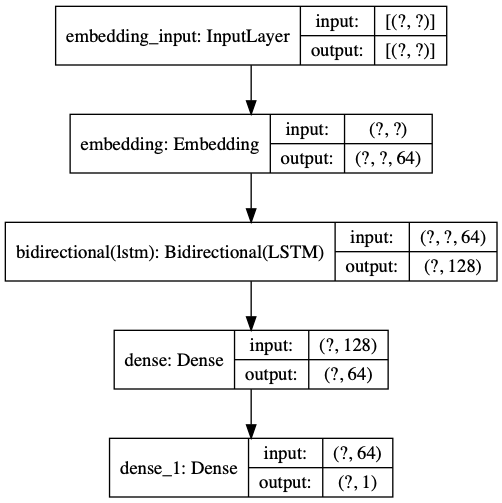

In [20]:
from keras.utils import plot_model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [27]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Embedding',
   'config': {'name': 'embedding',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'input_dim': 996,
    'output_dim': 64,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05,
      'maxval': 0.05,
      'seed': None,
      'dtype': 'float32'}},
    'embeddings_regularizer': None,
    'activity_regularizer': None,
    'embeddings_constraint': None,
    'mask_zero': False,
    'input_length': None}},
  {'class_name': 'Bidirectional',
   'config': {'name': 'bidirectional',
    'trainable': True,
    'dtype': 'float32',
    'layer': {'class_name': 'LSTM',
     'config': {'name': 'lstm',
      'trainable': True,
      'dtype': None,
      'return_sequences': False,
      'return_state': False,
      'go_backwards': False,
      'stateful': False,
      'unroll': False,
      'time_major': False,
      'units': 64,
      'activation': 'tanh',
   

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          63744     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 138,113
Trainable params: 138,113
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:

class prediction_history(tf.keras.callbacks.Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(model.predict(test_x))
#Calling the subclass

predictions=prediction_history()

#Executing the model.fit of the neural network
#model.fit(X=predictor_train, y=target_train, nb_epoch=2, batch_size=batch,validation_split=0.1,callbacks=[predictions]) 

#Printing the prediction history
#print predictions.predhis

In [ ]:
EPOCHS = 30
history = model.fit(train_x, train_y, 
                    batch_size=8, epochs=EPOCHS,
                    validation_data=(test_x, test_y), 
                    validation_steps=30,
                    callbacks=[predictions])

Train on 210 samples, validate on 71 samples
Epoch 1/30
210/210 [==============================] - 4s 21ms/sample - loss: 0.6767 - acc: 0.8048 - val_loss: 0.6579 - val_acc: 0.8310
Epoch 2/30
210/210 [==============================] - 3s 16ms/sample - loss: 0.6410 - acc: 0.8048 - val_loss: 0.6102 - val_acc: 0.8310
Epoch 3/30
 88/210 [===========>..................] - ETA: 1s - loss: 0.6056 - acc: 0.8068

In [ ]:
history.history['val_acc']


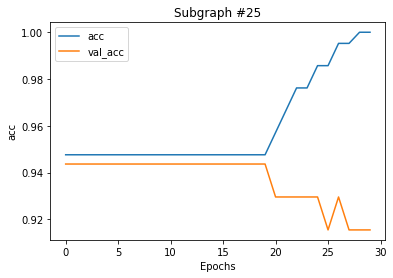

| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP = 0 | FP = 0 | 
| FN = 4 | TN = 67 |
Accuracy= 0.9436619718309859
| TP =

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history, string, subgraph_number):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.title("Subgraph #"+str(subgraph_number))
    plt.legend([string, 'val_'+string])
    
    plt.savefig("subgraph_num"+str(subgraph_number)+".png", bbox_inches='tight', format="png")
    plt.show()
    plt.close() 
    
plot_graphs(history, 'acc', subgraph_number)

#############################################################

#y_predict = model.predict(test_x)

def evaluate(predictions):
    precisions = []
    recalls    = []
    f1_scores  = []
    for prediction in predictions:
        TN = 0; FP = 0; FN = 0; TP = 0;

        for idx in range(len(prediction)):  
            predict_val = (prediction[idx])

            if(predict_val > 0.5):
                predict_val = 1
            else:
                predict_val = 0

            actual_val = int(test_y[idx])

            if((actual_val == 1) and (predict_val== test_y[idx])):
                TP += 1 #TP
            elif((actual_val == 0) and (predict_val == test_y[idx])):
                TN += 1  #TN
            elif((actual_val == 0) and (predict_val != test_y[idx])):
                FP += 1 # FP
            elif((actual_val == 1) and (predict_val != test_y[idx])):
                FN += 1 # FN


        print('| TP = {0} | FP = {1} | \n| FN = {2} | TN = {3} |'.format(TP, FP, FN, TN))

        accuracy = (TP+TN)/(TP+FN+FP+TN)
        print("Accuracy=", accuracy)

        try:
            precision = TP / (FP + TP)
            print("precision = ", precision)
        except ZeroDivisionError:
            continue
            precision = -1
            print ("divide by zero")
        precisions.append(precision)
        
        try:
            recall = TP / (FN + TP)
            print("recall = ", recall)
        except ZeroDivisionError:
            continue
            recall = -1
            print ("divide by zero")
        recalls.append(recall)
        
        try:
            f1_score = 2 * (precision * recall) / (precision + recall)
            print("F1_score = ", f1_score)
        except ZeroDivisionError:
            continue
            f1_score = -1
            print ("divide by zero")
        f1_scores.append(f1_score)
        
    
    if(len(precisions)<10 or len(recalls)<10 or len(f1_scores)<10):
        pass
    return precisions[-10:], recalls[-10:], f1_scores[-10:]

p, r, f = evaluate(predictions.predhis)




In [22]:
len(p)

10

In [23]:
len(p)

10

In [24]:
print("precision")
print("mean: ", statistics.mean(p))
print("min: ", statistics.mean(p)- min(p))
print("max: ", max(p)-statistics.mean(p))

print("recall")
print("mean: ", statistics.mean(r))
print("min: ", statistics.mean(r)-min(r))
print("max: ", max(r)-statistics.mean(r))

print("f1 score")
print("mean: ", statistics.mean(f))
print("min: ", statistics.mean(f)-min(f))
print("max: ", max(f)-statistics.mean(f))


precision
mean:  0.0
min:  0.0
max:  0.0
recall
mean:  0.0
min:  0.0
max:  0.0
f1 score


StatisticsError: mean requires at least one data point

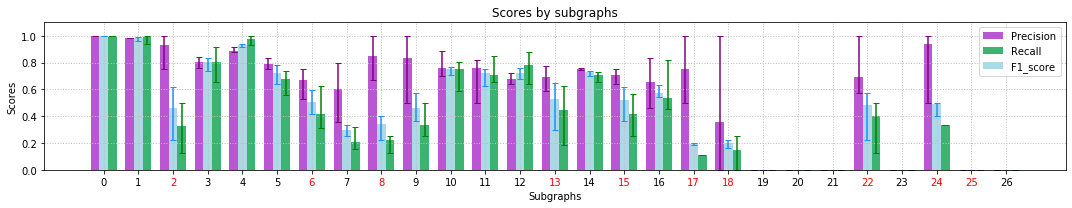

In [2]:
# import matplotlib
import matplotlib.pyplot as plt
import numpy as np


p_means = ( 1, 0.985, 0.935, 0.807, 0.888, 0.787, 0.667, 0.605, 0.852, 0.833, 0.758, 0.763, 0.675, 0.690, 0.749, 0.711,
           0.654, 0.750, 0.353, 0, 0, 0, 0.689, 0, 0.938, 0, 0)
p_std   = [[0, 0.001, 0.185, 0.044, 0.011, 0.037, 0.141, 0.252, 0.185, 0.333, 0.056, 0.263, 0.032, 0.102, 0.006, 0.068,
           0.193, 0.250, 0.353, 0, 0, 0, 0.118, 0, 0.438, 0, 0], 
           [0, 0.000, 0.065, 0.036, 0.029, 0.047, 0.082, 0.195, 0.148, 0.167, 0.130, 0.055, 0.049, 0.088, 0.014, 0.039,
           0.179, 0.250, 0.647, 0, 0, 0, 0.311, 0, 0.063, 0, 0]]

r_means = ( 1, 0.990, 0.325, 0.806, 0.975, 0.674, 0.419, 0.205, 0.222, 0.338, 0.749, 0.708, 0.779, 0.450, 0.707, 0.419,
           0.536, 0.111, 0.146, 0, 0, 0, 0.400, 0, 0.333, 0, 0)
r_std   = ([0, 0.049, 0.200, 0.153, 0.042, 0.119, 0.106, 0.047, 0.097, 0.088, 0.163, 0.054, 0.142, 0.263, 0.049, 0.169,
           0.082, 0.000, 0.146, 0, 0, 0, 0.275, 0, 0.000, 0, 0], 
           [0, 0.010, 0.175, 0.112, 0.025, 0.067, 0.206, 0.111, 0.028, 0.162, 0.056, 0.138, 0.100, 0.175, 0.024, 0.144,
           0.282, 0.000, 0.104, 0, 0, 0, 0.100, 0, 0.000, 0, 0])

f_means = ( 1, 0.987, 0.461, 0.804, 0.929, 0.725, 0.506, 0.295, 0.344, 0.458, 0.749, 0.726, 0.720, 0.527, 0.728, 0.518,
           0.575, 0.191, 0.202, 0, 0, 0, 0.480, 0, 0.488, 0, 0)
f_std   = ([0, 0.025, 0.239, 0.069, 0.012, 0.087, 0.090, 0.045, 0.122, 0.094, 0.043, 0.097, 0.043, 0.227, 0.026, 0.155,
           0.035, 0.009, 0.036, 0, 0, 0, 0.258, 0, 0.087, 0, 0], 
           [0, 0.005, 0.154, 0.029, 0.008, 0.059, 0.086, 0.039, 0.056, 0.113, 0.019, 0.024, 0.043, 0.118, 0.013, 0.102,
           0.059, 0.009, 0.020, 0, 0, 0, 0.091, 0, 0.013, 0, 0])
                 
                 


ind = np.arange(len(p_means))  # the x locations for the groups
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 3))
rects1 = ax.bar(ind -width, p_means, width, yerr=p_std, capsize=3, color='mediumorchid', ecolor='purple',
                label='Precision')
rects2 = ax.bar(ind + width, r_means, width, yerr=r_std, capsize=3, color='mediumseagreen', ecolor='g',
                label='Recall')
rects3 = ax.bar(ind,         f_means, width, yerr=f_std, capsize=3, color='lightblue', ecolor='dodgerblue',
                label='F1_score')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Subgraphs')
ax.set_title('Scores by subgraphs')
ax.set_xticks(ind)


ax.grid(color='silver', linestyle='dotted', linewidth=1)
ax.legend(loc='upper right', fontsize='medium')


plt.ylim(0, 1.1)
#######loop subgraphs###########3
plt.gca().get_xticklabels()[2].set_color("red")
plt.gca().get_xticklabels()[6].set_color("red")
plt.gca().get_xticklabels()[8].set_color("red")
plt.gca().get_xticklabels()[13].set_color("red")
plt.gca().get_xticklabels()[15].set_color("red")
plt.gca().get_xticklabels()[17].set_color("red")
plt.gca().get_xticklabels()[18].set_color("red")
plt.gca().get_xticklabels()[22].set_color("red")
plt.gca().get_xticklabels()[24].set_color("red")
plt.gca().get_xticklabels()[25].set_color("red")
######################


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        """
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    va='bottom')
        """


autolabel(rects1, "left")
autolabel(rects2, "right")
autolabel(rects3, "right")


fig.tight_layout()
plt.savefig("results.png", bbox_inches='tight')
plt.show()


In [7]:
statistics.mean([0.935, 0.667,0.852, 0.690,  0.711, 0.750, 0.353, 0.689, 0.938, 0])


0.6585

In [4]:
statistics.mean([1, 0.990, 0.325, 0.806, 0.975, 0.674, 0.419, 0.205, 0.222, 0.338, 0.749, 0.708, 0.779, 0.450, 0.707, 0.419,
           0.536, 0.111, 0.146, 0, 0, 0, 0.400, 0, 0.333, 0, 0])

0.4182222222222222

In [5]:
statistics.mean([ 1, 0.987, 0.461, 0.804, 0.929, 0.725, 0.506, 0.295, 0.344, 0.458, 0.749, 0.726, 0.720, 0.527, 0.728, 0.518,
           0.575, 0.191, 0.202, 0, 0, 0, 0.480, 0, 0.488, 0, 0])

0.4597407407407407

In [27]:
fs = [ 1, 0.987, 0.461, 0.804, 0.929, 0.725, 0.506, 0.295, 0.344, 0.458, 0.749, 0.726, 0.720, 0.527, 0.728, 0.518,
           0.575, 0.191, 0.202, 0, 0, 0, 0.480, 0, 0.488, 0, 0]

In [28]:
import numpy
sort_index = numpy.argsort(fs, )

In [29]:
sort_index

array([26, 23, 21, 20, 19, 25, 17, 18,  7,  8,  9,  2, 22, 24,  6, 15, 13,
       16, 12,  5, 11, 14, 10,  3,  4,  1,  0])